In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import drive
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import time
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
data_folder = '/content/gdrive/MyDrive/KAGGLE/G-Research Crypto Forecasting/Data/'
crypto_df= pd.read_csv(data_folder + 'train.csv')

In [3]:
crypto_df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


# 데이터 설명
1. Timestamp: 모든 타임스탬프는 두 번째 유닉스 타임스탬프로 반환됩니다(UTC 1970-01-01:00:00:00.000 이후 경과된 초). 이 데이터 집합의 타임스탬프는 분 단위 데이터를 나타내는 60의 배수입니다.
2. Asset_ID: 암호화폐 중 하나에 해당하는 자산 ID(예: 자산_)ID = 1(비트코인의 경우). 자산_의 매핑자산 암호화 ID는 asset_details.csv에 포함되어 있습니다.
3. Count: 시간 간격(마지막 분)의 총 거래 수입니다.
4. Open: 시간 간격의 개시 가격(USD).
5. High: 시간 간격 동안 도달한 최고 가격(USD).
6. Low: 시간 간격 동안 도달한 최저 가격(USD).
7. Close: 시간 간격의 마감 가격(USD).
8. Volume: 구매 또는 판매된 자산의 수량으로, 기준 통화 USD로 표시됩니다.
9. VWAP: 시간 간격 동안 자산의 평균 가격(볼륨별 가중치)입니다. VWAP는 무역 데이터의 집계된 형태이다.
10. Target: 15분 지평선 이상 자산에 대한 잔여 로그 반환

In [4]:
asset_details = pd.read_csv(data_folder + 'asset_details.csv')
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [16]:
crypto_df_withdate = pd.DataFrame([])
for i,j in zip(asset_details.Asset_ID, asset_details.Asset_Name):
    one_df = crypto_df[crypto_df['Asset_ID'] == i].set_index("timestamp")
    # 데이터 전처리 -> 60분 간격이 아닌 경우 바로 전 column의 값을 가져와서 붙임
    one_df = one_df.reindex(range(one_df.index[0], one_df.index[-1]+60, 60), method = 'pad')
    one_df.reset_index(inplace = True)
    one_df['datetime'] = one_df['timestamp'].apply(lambda s: datetime.fromtimestamp(s).strftime("%Y-%m-%d %H:%M:%S"))
    crypto_df_withdate = pd.concat([crypto_df_withdate, one_df], axis = 0)
crypto_df_withdate.reset_index(drop = True, inplace = True)
crypto_df_withdate

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime
0,1514764860,2,40.0,2376.580000,2399.50000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218,2018-01-01 00:01:00
1,1514764920,2,53.0,2374.553333,2400.90000,2354.200000,2372.286667,2.405026e+01,2371.434498,-0.004079,2018-01-01 00:02:00
2,1514764980,2,61.0,2371.633333,2401.90000,2353.700000,2372.063333,4.267644e+01,2375.442755,-0.002892,2018-01-01 00:03:00
3,1514765040,2,95.0,2376.060000,2406.40000,2344.000000,2370.566667,3.782092e+01,2371.096152,-0.003718,2018-01-01 00:04:00
4,1514765100,2,33.0,2372.656667,2404.60000,2343.400000,2370.173333,8.519679e+00,2370.345730,-0.002171,2018-01-01 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...
26080038,1632182160,4,483.0,0.208072,0.20820,0.207294,0.207445,1.895146e+06,0.207764,NaN,2021-09-20 23:56:00
26080039,1632182220,4,394.0,0.207461,0.20754,0.206800,0.206920,1.059219e+06,0.207244,NaN,2021-09-20 23:57:00
26080040,1632182280,4,297.0,0.206892,0.20710,0.206600,0.206797,4.201725e+05,0.206832,NaN,2021-09-20 23:58:00
26080041,1632182340,4,980.0,0.206821,0.20880,0.206784,0.208621,2.583981e+06,0.207613,NaN,2021-09-20 23:59:00


# 차트 그리기

### 1. Candelstick chart

In [9]:
btc = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp") # Asset_ID = 1은 비트코인이다.
btc_mini = btc.iloc[-200:] # Select recent data rows

fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=btc_mini['Open'], high=btc_mini['High'], low=btc_mini['Low'], close=btc_mini['Close'])])
fig.show()

In [10]:
for i in range(0,14):
    coin = crypto_df[crypto_df["Asset_ID"]==i].set_index("timestamp")
    coin_mini = coin.iloc[-200:] # Select recent data rows

    fig = go.Figure(data=[go.Candlestick(x=coin_mini.index, open=coin_mini['Open'], high=coin_mini['High'], low=coin_mini['Low'], close=coin_mini['Close'])])
    fig.update_layout(
        title=dict(
            # <br> 태크와 <sup>태그 사용해서 서브 타이틀을 작성할 수 있음
            text='{} Candlestick Graph'.format(asset_details[asset_details['Asset_ID'] == i]['Asset_Name'].values[0]),
            x=0.5,
            y=0.87,
            font=dict(
                family="Arial",
                size=25,
                color="#000000"
            )
        )
    )
    fig.show()

**코인들 사이에 비슷한 상승 / 하강 곡선을 그림을 알 수 있음**

### 2. line plot

close price를 비교해보자

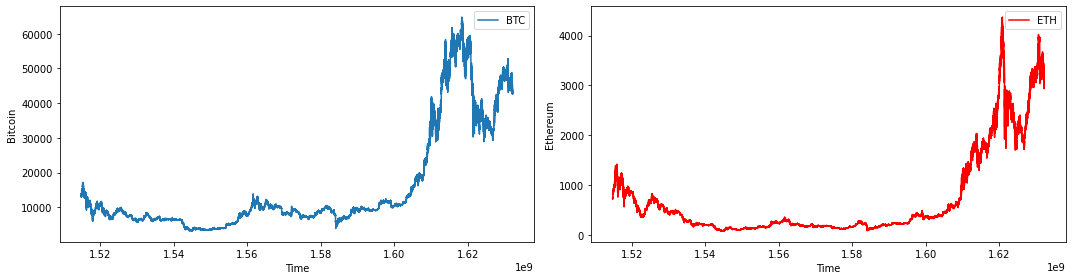

In [11]:
f = plt.figure(figsize=(15,4))

eth = crypto_df[crypto_df["Asset_ID"]==6].set_index("timestamp") # Asset_ID = 6는 이더리움이다.
#이더리움의 결측치 채워주기
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')

# 비트코인의 결측치 채워주기
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')

ax = f.add_subplot(121)
plt.plot(btc['Close'], label='BTC')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin')

ax2 = f.add_subplot(122)
ax2.plot(eth['Close'], color='red', label='ETH')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum')

plt.tight_layout()
plt.show()

In [12]:
# timestamp 형식으로 바꿔주기
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

# 2021 6월 1일부터 7월 1일까지 그래프 확인
btc_mini_2021 = btc.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]
eth_mini_2021 = eth.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]

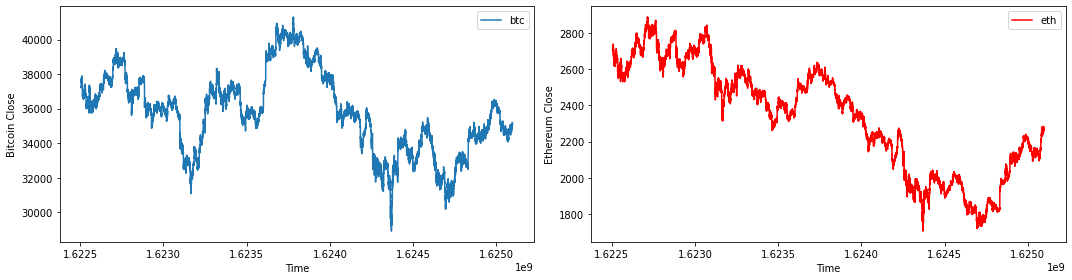

In [13]:
# 2021년 6월 1일 ~ 7월 1일 사이의 이더리움 / 비트코인 가격 그래프 비교
f = plt.figure(figsize=(15,4))

ax = f.add_subplot(121)
plt.plot(btc_mini_2021['Close'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Close')

ax2 = f.add_subplot(122)
ax2.plot(eth_mini_2021['Close'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Close')

plt.tight_layout()
plt.show()

### 3. 로그 변환

코인별 로그 수익률을 비교

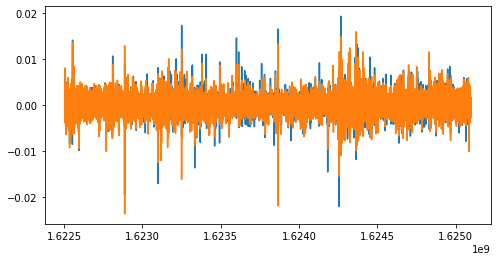

In [14]:
# 로그 변환하여 그 차이를 보기
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

import scipy.stats as stats

lret_btc = log_return(btc_mini_2021.Close)[1:]
lret_eth = log_return(eth_mini_2021.Close)[1:]
lret_btc.rename('lret_btc', inplace=True)
lret_eth.rename('lret_eth', inplace=True)

plt.figure(figsize=(8,4))
plt.plot(lret_btc);
plt.plot(lret_eth);
plt.show()

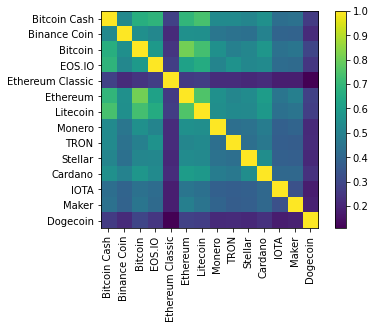

In [15]:
all_assets_2021 = pd.DataFrame([])
for asset_id, asset_name in zip(asset_details.Asset_ID, asset_details.Asset_Name):
  asset = crypto_df[crypto_df["Asset_ID"]==asset_id].set_index("timestamp")
  asset = asset.loc[totimestamp('01/01/2021'):totimestamp('01/05/2021')]
  asset = asset.reindex(range(asset.index[0],asset.index[-1]+60,60),method='pad')
  lret = log_return(asset.Close.fillna(0))[1:]
  all_assets_2021 = all_assets_2021.join(lret, rsuffix=asset_name, how="outer")

plt.imshow(all_assets_2021.corr());
plt.yticks(range(14), asset_details.Asset_Name.values);
plt.xticks(range(14), asset_details.Asset_Name.values, rotation='vertical');
plt.colorbar();